In [1]:
### plotting histograms of radar freeboard data to check distribution is normal for Pearson's correlation

In [ ]:
import numpy as np
import glob
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import griddata
from netCDF4 import Dataset
import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv('/Users/carmennab/PhD/OI_PolarSnow/dataframes/WG_vs_SM_regional_anomalies_smoothed.csv',header=[0,1,2])
regions = ['Kara','Laptev','E. Siberian','Chukchi','Beaufort','Can. Arch.','Central Arctic']
random_Bristol = ['Unnamed: 8_level_2','Unnamed: 9_level_2','Unnamed: 10_level_2','Unnamed: 11_level_2','Unnamed: 12_level_2',
             'Unnamed: 13_level_2','Unnamed: 14_level_2']
seasons = ['2010-2011','2011-2012','2012-2013','2013-2014','2014-2015','2015-2016','2016-2017','2017-2018','2018-2019',
          '2019-2020','2020-2021']

In [29]:
df['SM']

,Kara,Laptev,E. Siberian,Chukchi,Beaufort,Can. Arch.,Central Arctic
,Unnamed: 50_level_2,Unnamed: 51_level_2,Unnamed: 52_level_2,Unnamed: 53_level_2,Unnamed: 54_level_2,Unnamed: 55_level_2,Unnamed: 56_level_2
0,-0.001721,-0.001377,-0.000472,-0.001623,-0.001611,0.001007,-0.002438
1,-0.001488,-0.001261,-0.000677,-0.001584,-0.001704,0.000877,-0.002396
2,-0.001315,-0.001181,-0.000839,-0.001449,-0.001716,0.000700,-0.002295
3,-0.001206,-0.001131,-0.000945,-0.001207,-0.001630,0.000476,-0.002130
4,-0.001119,-0.001117,-0.000991,-0.000845,-0.001397,0.000193,-0.001904
...,...,...,...,...,...,...,...
3983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3985,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dates = df['Unnamed: 0_level_0']['Unnamed: 0_level_1']['Date']
days = [np.arange(334,455), # 2010-2011
        np.arange(699,821), # 2011-2012
        np.arange(1065,1186), # 2012-2013
        np.arange(1430,1551), # 2013-2014
        np.arange(1795,1916), # 2014-2015
        np.arange(2160,2282), # 2015-2016
        np.arange(2526,2647), # 2016-2017
        np.arange(2891,3012), # 2017-2018
        np.arange(3256,3377), # 2018-2019
        np.arange(3621,3743), # 2019-2020
        np.arange(3743,len(dates)) #2020-2021
       ]

In [5]:
Kara = df['CS2_Bristol']['Kara']['Unnamed: 8_level_2']
Laptev = df['CS2_Bristol']['Laptev']['Unnamed: 9_level_2']
Sib = df['CS2_Bristol']['E. Siberian']['Unnamed: 10_level_2']
Chuk = df['CS2_Bristol']['Chukchi']['Unnamed: 11_level_2']
Bea = df['CS2_Bristol']['Beaufort']['Unnamed: 12_level_2']
Can = df['CS2_Bristol']['Can. Arch.']['Unnamed: 13_level_2']
Cen = df['CS2_Bristol']['Central Arctic']['Unnamed: 14_level_2']

2010-2011


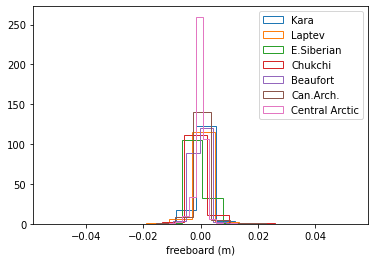

2011-2012


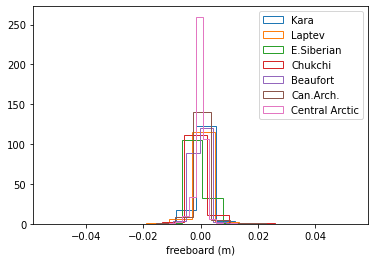

2012-2013


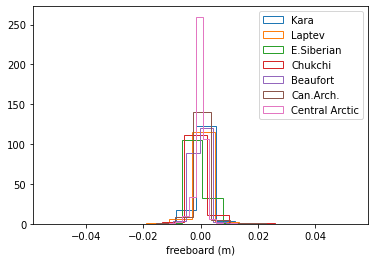

2013-2014


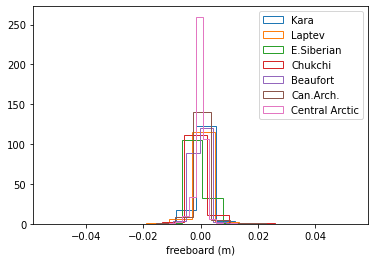

2014-2015


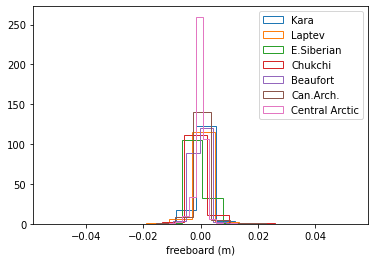

2015-2016


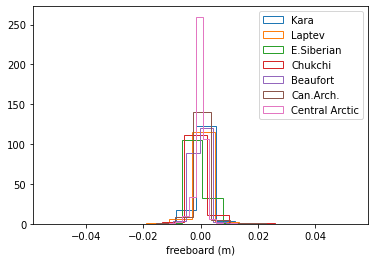

2016-2017


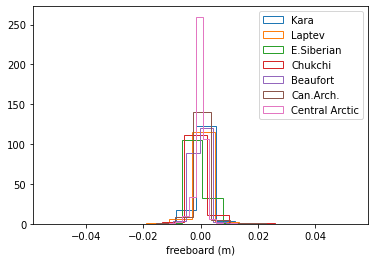

2017-2018


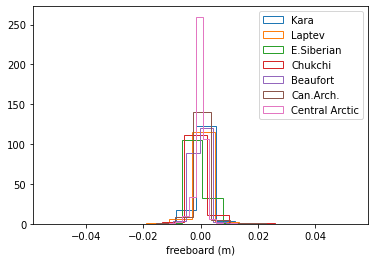

2018-2019


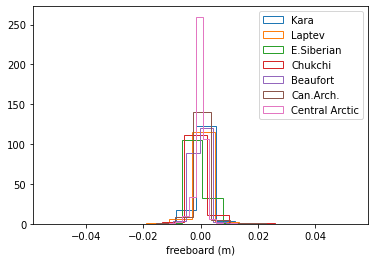

2019-2020


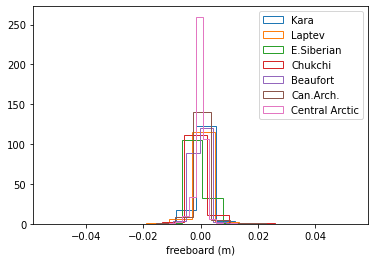

2020-2021


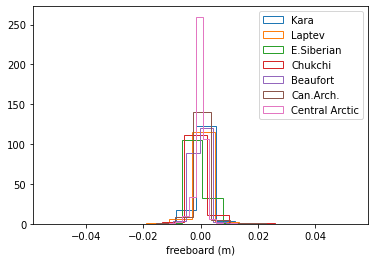

In [27]:
regions = [Kara,Laptev,Sib,Chuk,Bea,Can,Cen]
reg_name = ['Kara','Laptev','E.Siberian','Chukchi','Beaufort','Can.Arch.','Central Arctic']
for season, day,  in zip(seasons, days):
    print(season)
    for region, reg in zip(regions, reg_name):
        plt.hist(region.ravel(), histtype='step', density = True, bins= 10, label = reg)
        plt.legend()
        plt.xlabel('freeboard (m)')
    plt.show()

In [31]:
Kara = df['SM']['Kara']['Unnamed: 50_level_2']
Laptev = df['SM']['Laptev']['Unnamed: 51_level_2']
Sib = df['SM']['E. Siberian']['Unnamed: 52_level_2']
Chuk = df['SM']['Chukchi']['Unnamed: 53_level_2']
Bea = df['SM']['Beaufort']['Unnamed: 54_level_2']
Can = df['SM']['Can. Arch.']['Unnamed: 55_level_2']
Cen = df['SM']['Central Arctic']['Unnamed: 56_level_2']

2010-2011


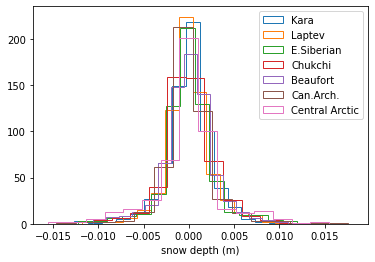

2011-2012


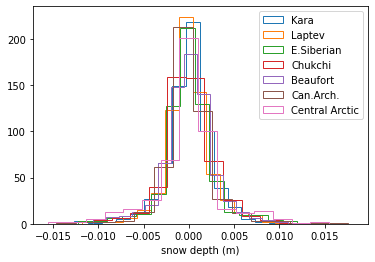

2012-2013


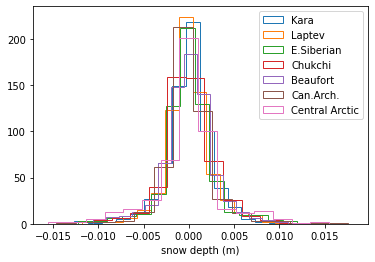

2013-2014


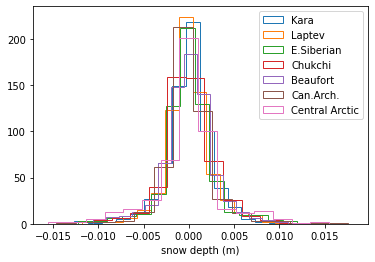

2014-2015


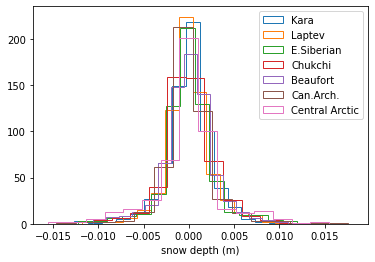

2015-2016


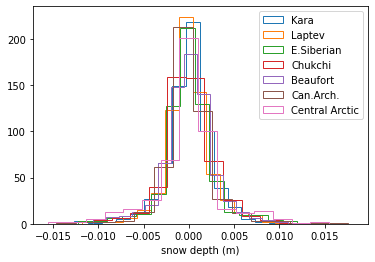

2016-2017


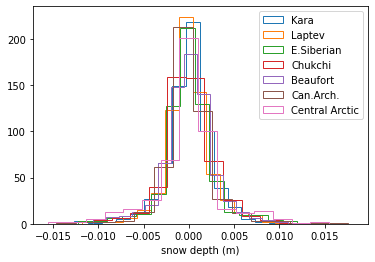

2017-2018


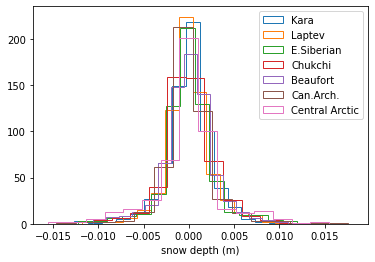

2018-2019


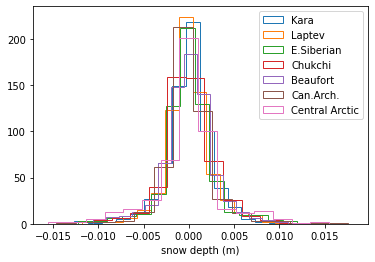

2019-2020


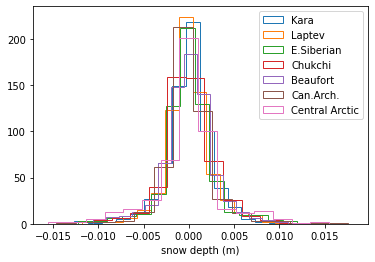

2020-2021


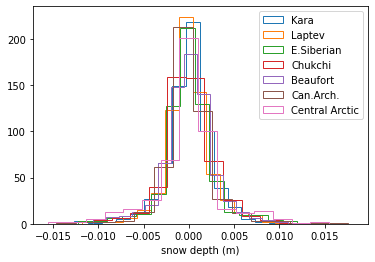

In [35]:
regions = [Kara,Laptev,Sib,Chuk,Bea,Can,Cen]
reg_name = ['Kara','Laptev','E.Siberian','Chukchi','Beaufort','Can.Arch.','Central Arctic']
for season, day,  in zip(seasons, days):
    print(season)
    for region, reg in zip(regions, reg_name):
        plt.hist(region.ravel(), histtype='step', density = True, bins= 15, label = reg)
        plt.legend()
        plt.xlabel('snow depth (m)')
    plt.show()